In [2]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
 class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
 train_images = train_images / 255.0
test_images = test_images / 255.0


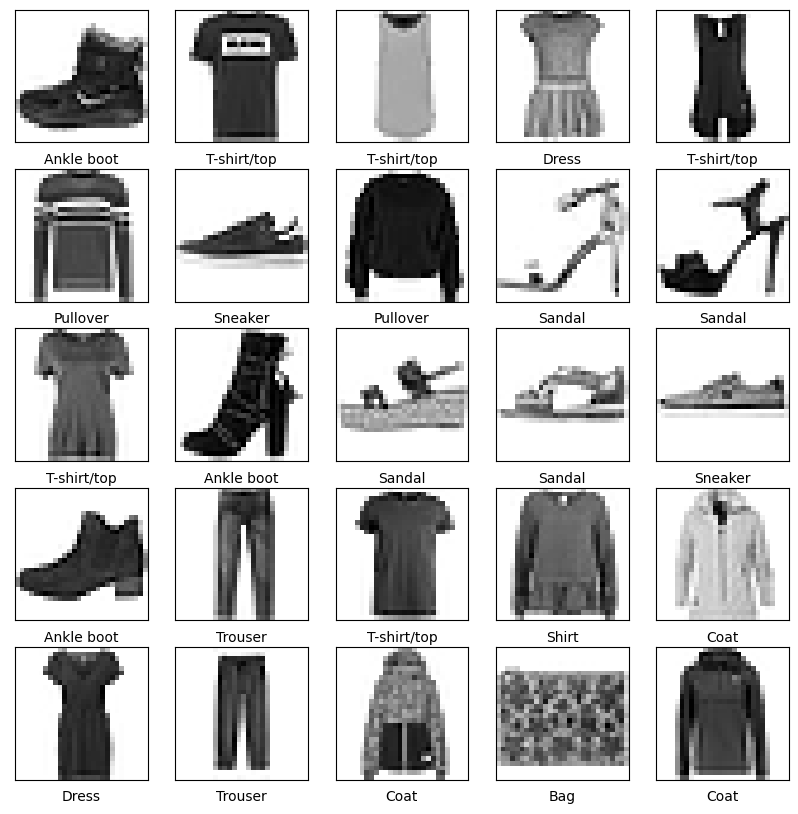

In [7]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', # Use sparse categoricalcrossentropy since labels are integers
metrics=['accuracy'])
model.summary()

C:\Users\aryam\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7502 - loss: 0.6849
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8800 - loss: 0.3306
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9001 - loss: 0.2695
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9130 - loss: 0.2397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9205 - loss: 0.2152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9281 - loss: 0.1918
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9358 - loss: 0.1714
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9415 - loss: 0.1571
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9486 - loss: 0.1395
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9495 - loss: 0.1326


In [10]:
model.save("fashion_mnist_cnn_model.h5")

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9121 - loss: 0.2705

 Test accuracy =  0.9121000170707703


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
# predictions = probability_model.predict(test_images)
import numpy as np

# Reshape test_images
test_images_reshaped = test_images.reshape(-1, 28, 28, 1)

# Predict using the model
predictions = model.predict(test_images_reshaped)

# To get the predicted labels
# predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img =true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

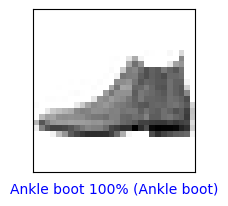

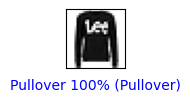

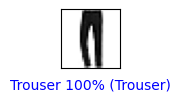

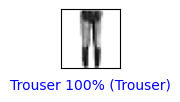

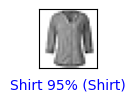

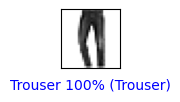

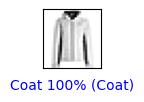

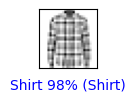

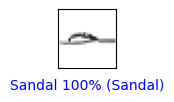

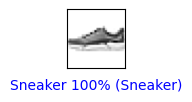

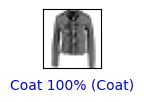

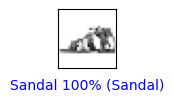

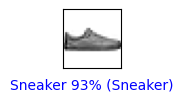

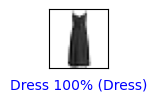

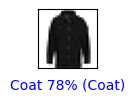

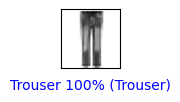

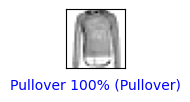

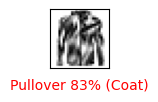

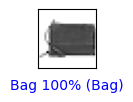

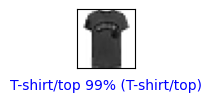

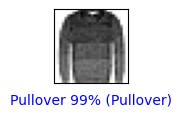

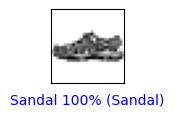

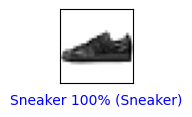

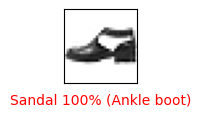

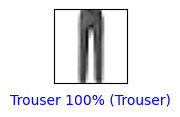

In [15]:
rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
    plt.subplot(rows, cols, i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.tight_layout()
    plt.show()

In [16]:
model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')

In [19]:
class FashionClassifierApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Fashion Classifier")
# Create GUI elements
        self.label = tk.Label(root, text="Upload an image of a fashion item toclassify:")
        self.label.pack()
        self.upload_button = tk.Button(root, text="Upload Image", command=self.upload_image)
        self.upload_button.pack()
        self.image_label = tk.Label(root)
        self.image_label.pack()
        self.predict_button = tk.Button(root, text="Predict", command=self.predict_image)
        self.predict_button.pack()
        self.result_label = tk.Label(root, text="")
        self.result_label.pack()
    def upload_image(self):
# Open a file dialog to select an image file
        file_path = filedialog.askopenfilename()
# Open and display the selected image
        image = Image.open(file_path)
        image = image.resize((150, 150)) # Resize image to fit the GUI
        self.photo = ImageTk.PhotoImage(image)
        self.image_label.config(image=self.photo)
# Save the image data for prediction
        self.image_data = image
    
    def predict_image(self):
        image = self.image_data.resize((28, 28))
# Preprocess the image for model prediction
        image = image.convert('L') # Convert image to grayscale
        image = np.array(image) / 255.0 # Normalize pixel values
        image = np.expand_dims(image, axis=0) # Add batch dimension
# Make prediction using the model
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)
# Map predicted class index to actual label
        class_labels = ["T-shirt/top", "Trouser", "Shirt", "Pull over", "Coat","Sandal", "Dress","Tshirt", "Sneaker","Ankle boot", "Bag" ]
        result_text = f"Predicted Class: {class_labels[predicted_class]}"
# Update the result label with the prediction
        self.result_label.config(text=result_text)

In [18]:
root = tk.Tk()
root.geometry("600x400") # Set the initial size of the window
app = FashionClassifierApp(root)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
